In [18]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Banknote dataset   
#### Source:  
http://archive.ics.uci.edu/ml/datasets/banknote+authentication

#### Data Set Information:  
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images. 

#### Attribute Information:  
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (Authentic(0) and Counterfeit(1)) 

In [8]:
dataset_name = 'banknote'

In [20]:
file_path = '~/data/bank-note/'
file_name = 'data_banknote_authentication.txt'
file = file_path + file_name
df = pd.read_csv(file, names=['variance','skewness','kurtosis','entropy','class'])
df.shape

(1372, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
kurtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [11]:
df.head()

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
df.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
# check dataframe for bad data
df.isnull().any() | df.isna().any()

variance    False
skewness    False
kurtosis    False
entropy     False
class       False
dtype: bool

In [14]:
(df.isnull() | df.isna()).sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [15]:
# add a class label based on the class value (to make labeling plots easier)
df['class_label'] = np.where(df['class']>0, 'counterfeit', 'authentic')

In [16]:
# get the feature names to make plotting easier
feature_names = list(df.columns.values)
feature_names.remove('class')
feature_names.remove('class_label')

Authentic:    762
Counterfeit:  610


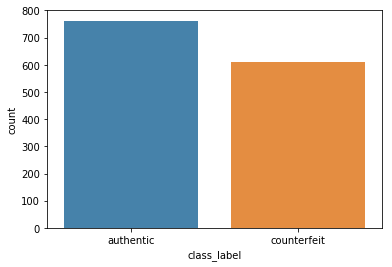

In [17]:
# get the number of samples for each class
num_authentic = df[df['class'] == 0].shape[0]
num_counterfeit = df[df['class'] == 1].shape[0]

print('Authentic:   ',num_authentic)
print('Counterfeit: ', num_counterfeit)

sns_plot = sns.countplot(x='class_label', data=df, alpha=.9)
plt.savefig(dataset_name + '_countplot.png')
plt.show()

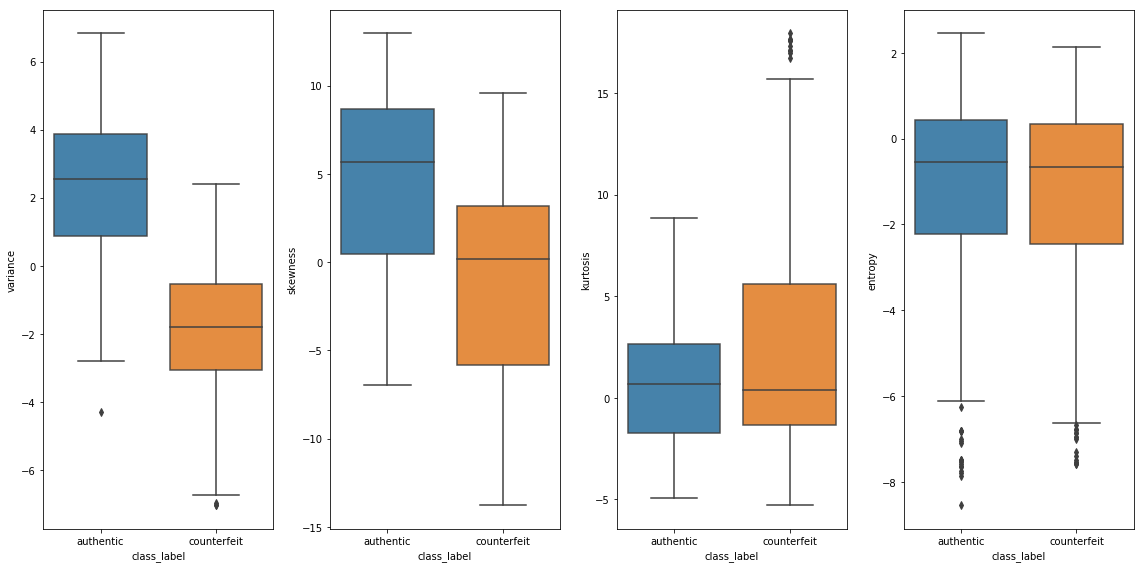

In [74]:
num_plots = len(feature_names)
num_columns = 4
num_rows = math.ceil(num_plots/num_columns) # round up
x_label = 'class_label'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,8))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.boxplot(x=x_label, y=name, data=df, ax=axs[index], boxprops=dict(alpha=.9))
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.boxplot(x=x_label, y=name, data=df, ax=axs[row][col], boxprops=dict(alpha=.9))
plt.tight_layout()
plt.savefig(dataset_name + '_boxplots.png')  
plt.show()

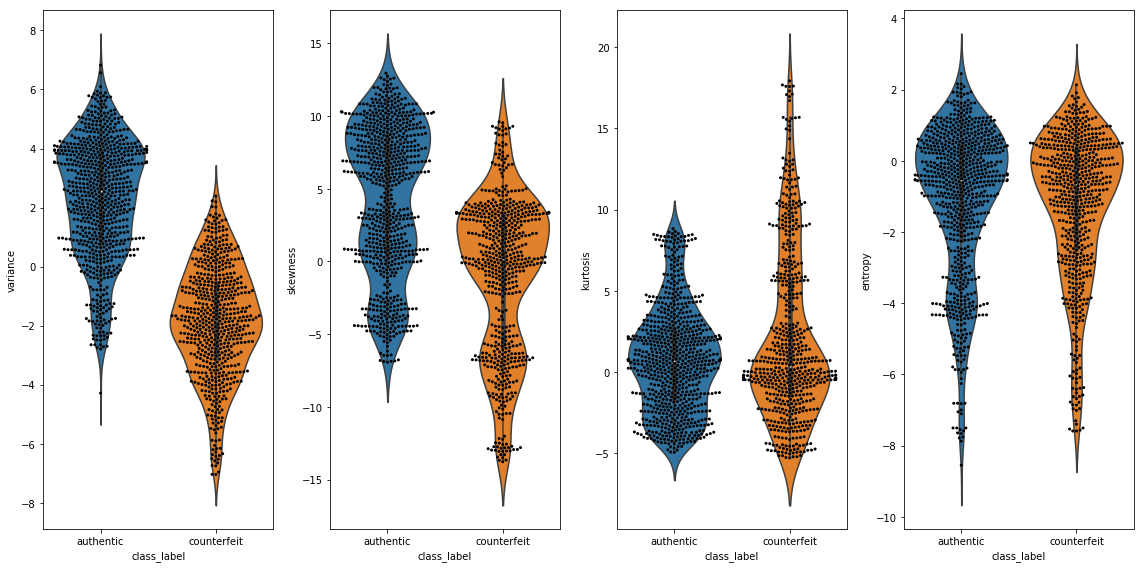

In [75]:
num_plots = len(feature_names)
num_columns = 4
num_rows = math.ceil(num_plots/num_columns) # round up
x_label = 'class_label'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,8))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.violinplot(x=x_label, y=name, data=df, ax=axs[index])
        sns.swarmplot(x=x_label, y=name, data=df, ax=axs[index], color='k', size=3);
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.violinplot(x=x_label, y=name, data=df, ax=axs[row][col])
        sns.swarmplot(x=x_label, y=name, data=df, ax=axs[row][col], color='k', size=3);
plt.tight_layout()
plt.savefig(dataset_name + '_violinplots.png')  
plt.show()

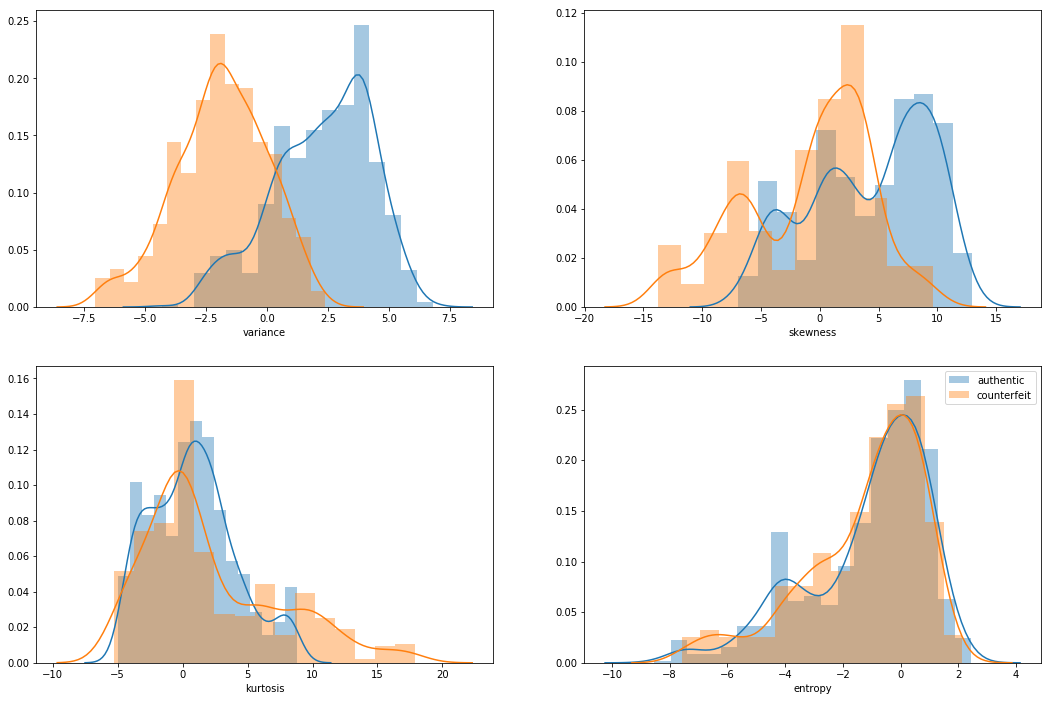

In [76]:
num_plots = len(feature_names)
num_columns = 2
num_rows = math.ceil(num_plots/num_columns) # round up
label = 'class'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,12))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.distplot(df[df[label]==0][name], ax=axs[index])
        sns.distplot(df[df[label]==1][name], ax=axs[index])
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[df[label]==0][name], ax=axs[row][col])
        sns.distplot(df[df[label]==1][name], ax=axs[row][col])
plt.legend(['authentic','counterfeit'])
plt.savefig(dataset_name + '_distplots_by_class.png')  
plt.show()

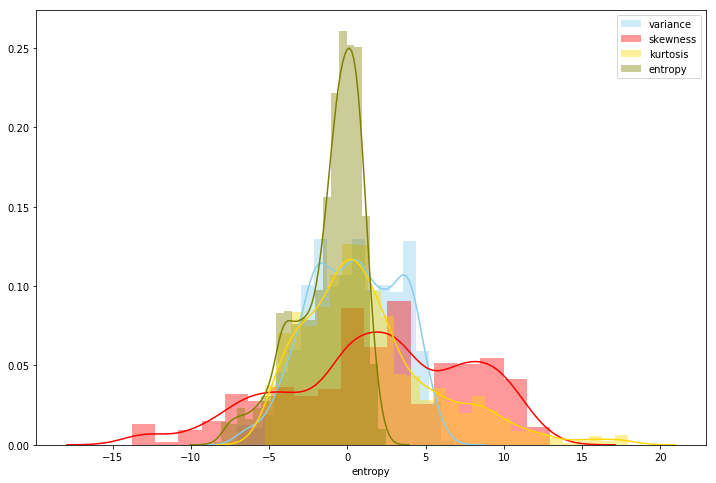

In [77]:
# distribution plot without factoring in class
fig, axs = plt.subplots(figsize=(12,8))
sns.distplot(df['variance'], color='skyblue')
sns.distplot(df['skewness'], color='red')
sns.distplot(df['kurtosis'], color='gold')
sns.distplot(df['entropy'], color='olive')
plt.legend(['variance','skewness','kurtosis','entropy'])
plt.savefig(dataset_name + '_distplots.png')  
plt.show()

In [78]:
# compute pairwise correlation of the attributes
corr = df.corr()
corr

,variance,skewness,kurtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
kurtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


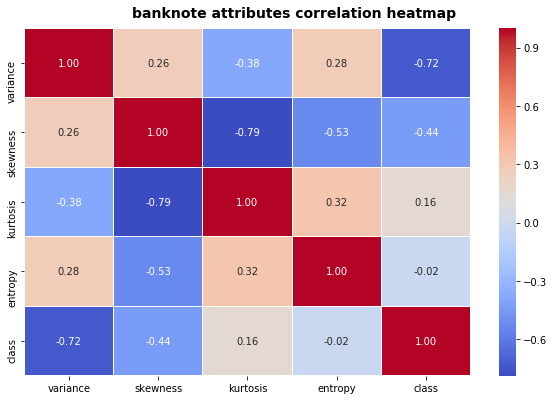

In [79]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle(dataset_name + ' attributes correlation heatmap', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_heatmap.png')  
plt.show()

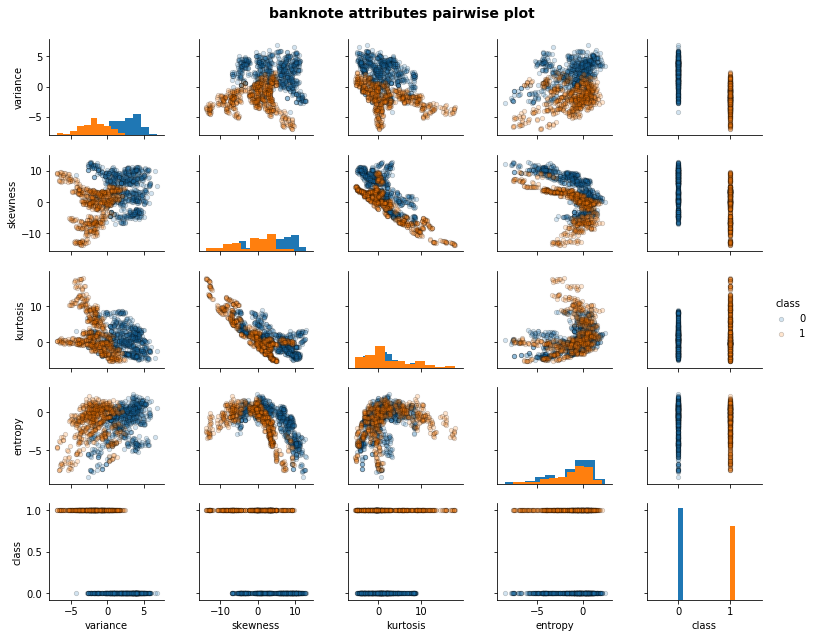

In [80]:
pp = sns.pairplot(df, height=1.8, aspect=1.2, hue='class', diag_kind='hist',
                  plot_kws = {'alpha': 0.2, 's': 20, 'edgecolor': 'k'})

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot_hist.png')  
plt.show()

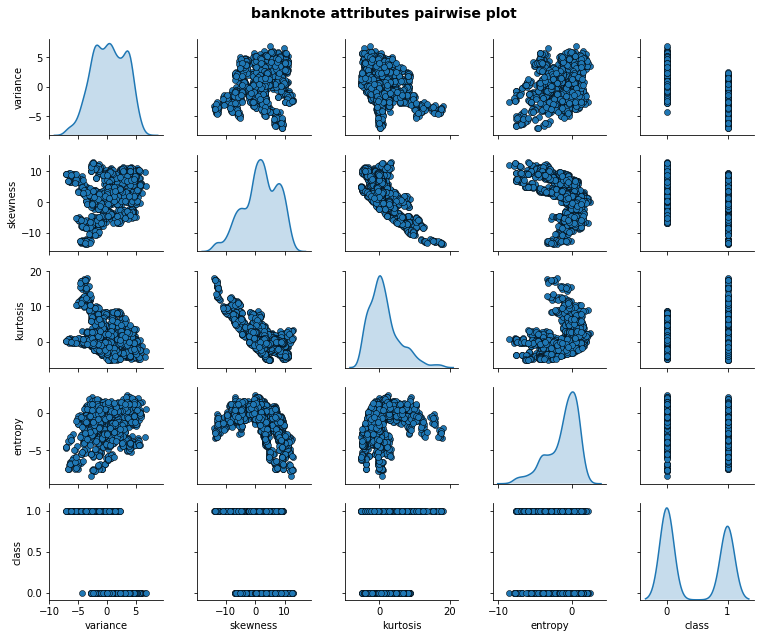

In [81]:
pp = sns.pairplot(df, height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot.png')  
plt.show()